In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mplstyles
%matplotlib inline

/home/jhaux/.local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 2-B

In [23]:
def deg2rad(deg):
    return deg * np.pi / 180

def h2deg(h):
    return h*15.

def h2rad(h):
    return deg2rad(h2deg(h))

def X(HA, Phi=31.0442, DEC=43+62/60+25./3600.):
    return 1./ (np.cos(deg2rad(Phi))*np.cos(deg2rad(DEC))*np.cos(deg2rad(HA)) + np.sin(deg2rad(Phi))*np.sin(deg2rad(DEC)))


MV = -5.21
m0V = 5*np.log10(610) - 5 + MV
UmV0 = -1.42
m0U = UmV0 + m0V

print 'm0U = UmV0 + m0V\n{0} = {1} + {2}'.format(m0U, UmV0, m0V)

def UmVobs(HA, m0V, m0U, kV=0.18, kU=0.53):
    return m0U+kU*X(HA) - (m0V+kV*X(HA))

HAs = h2deg(np.array([-4, 0, 3]))
for HA in HAs:
    umv = UmVobs(HA, m0V, m0U)
    uu = UmV0 / umv
    print '{0}:\t{1}\t{2}'.format(HA, umv, uu)

m0U = UmV0 + m0V
2.29664917505 = -1.42 + 3.71664917505
-60.0:	-0.894788274381	1.58696759966
0.0:	-1.06084740158	1.33855255514
45.0:	-0.979207644413	1.45015207765


In [4]:
def plotX(ax, H, start=2, toa=3, c='k'):
    H_d = h2deg(H)
    if H < 0:
        H_d += 0
        wedge = mpatches.Wedge((0,0), start,  360+90, 360+90-H_d, color=c,fill=False)
    else:
        H_d += 0
        wedge = mpatches.Wedge((0,0), start, H_d, 360+90, color=c,fill=False)
    H_r = h2rad(H)
    ax.arrow(0,0,toa*np.tan(H_r),toa, head_width=0., head_length=0., fc='k', ec=c)
    ax.add_artist(wedge)

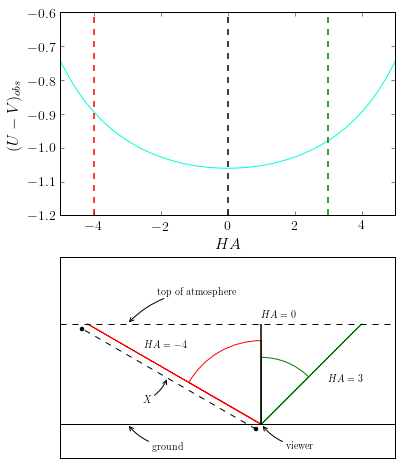

In [22]:
Hs = h2deg(np.linspace(-12, 12, 100))
Hx = np.linspace(-12, 12, 100)
UmVo = [UmVobs(h, m0V, m0U) for h in Hs]
fig, (ax, ax2) = plt.subplots(2,1, figsize=(6,8))
#ax.plot(Hx, X(Hs), label='X')
ax.plot(Hx, UmVo, label='U-V')

ax.axvline(-4, color='r', ls='--', lw=1.5)
ax.axvline(0, color='k', ls='--', lw=1.5)
ax.axvline(3, color='g', ls='--', lw=1.5)

ax.set_xlim(-5,5)
ax.set_ylim(-1.2,-0.6)
ax.set_xlabel('$HA$')
ax.set_ylabel('$(U-V)_{obs}$')

toa = 3   # top of atmospere
angle = -45
ax2.axhline(0, color='k')
ax2.axhline(toa, color='k', ls='--')
plotX(ax2, -4, 2.5, c='r')
plotX(ax2, 3, 2, c='g')
ax2.arrow(0,0,0,toa, head_width=0., head_length=0, fc='k', ec='k', lw=1.5)
ax2.text(-3.5, 2.3, '$HA=-4$')
ax2.text(0, 3.2, '$HA=0$')
ax2.text(2, 1.3, '$HA=3$')
ax2.annotate('top of atmosphere', 
            xy=(-4, toa), xycoords='data',
            xytext=(30, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2")
           )
ax2.annotate('ground', 
            xy=(-4, 0), xycoords='data',
            xytext=(25, -25), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-.2")
           )
ax2.annotate('viewer', 
            xy=(0, 0), xycoords='data',
            xytext=(25, -25), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-.2")
           )

s = 0.15
ax2.plot([-s,toa*np.tan(h2rad(-4))-s], [ -s, toa-s], 'k--', marker='o', ms=4)
ax2.annotate('$X$', 
            xy=(-2.8, 1.4), xycoords='data',
            xytext=(-25, -25), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2")
           )
ax2.set_ylim(-1,5)
ax2.set_xlim(-6,4)
ax2.set_aspect(1)
ax2.set_xticks([])
ax2.set_yticks([])

fig.savefig('umv.pdf')

## 2-C 
### 1)
Load the first dataset:

In [6]:
BV = np.genfromtxt('../data/BV_photometry.dat')
B = BV[:,0]
V = BV[:,1]
BmV = B-V

### 2)
Load the second dataset:

In [24]:
age = np.genfromtxt('../data/age_3.5gyr.dat')
V2 = age[:, 1]
B2 = age[:, 0]
B2mV2 = B2 - V2

Define mapping from apparent magnitude $m$ to absolute magnitude $M$ and vice versa, using the equation

\begin{align}
    m - M &= 5\operatorname{log}_{10}(d) - 5
\end{align}


In [25]:
def M(m, d=890):
    return m - 5*np.log10(d) + 5

def m(M, d=890):
    return 5*np.log10(d) - 5 + M

Correct the second dataset from absolute to apparent magnitudes and plot the corrected data:

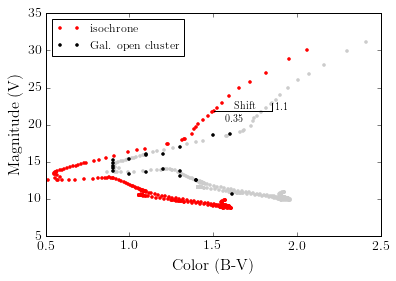

In [26]:
mV2 = m(V2)
mB2 = m(B2)
B2mV2 = mB2 - mV2

fig, ax = plt.subplots(1,1)
ax.plot(B2mV2, mV2, 
        '.r', 
        label='isochrone')
shiftBV = 0.35
shiftV = 1.1
ax.plot(B2mV2 + shiftBV, mV2 + shiftV, 
        '.', color=(0.8,0.8,0.8))
ax.plot(B-V, V, '.k', label='Gal. open cluster')

#x = 0.75
#y = 22
idx = 8
x = B2mV2[idx]
y = mV2[idx]

X1 = np.array([x, x+shiftBV])
Y1 = np.array([y, y])

X2 = np.array([x+shiftBV, x+shiftBV])
Y2 = np.array([y, y+shiftV])

ax.plot(X1, Y1, 'k')
ax.plot(X2, Y2, 'k')
ax.text(x+0.02+shiftBV, y, '{0}'.format(shiftV))
ax.text(x+0.07, y-1.5, '{0}'.format(shiftBV))
ax.text(x+0.12, y+0.1, 'Shift')

ax.set_xlabel('Color (B-V)')
ax.set_ylabel('Magnitude (V)')
ax.legend(loc=2)

fig.savefig('../pic/CMD.pdf')

The locus of the isochrone is shifted into the red with respect to the CMD. This is probably due to the age of the cluster as with age the light of the stars shifts to the red.

## 2-D

Diameter $D = \SI{6.57}{\meter}$

$N = 20$

$l_{pixel} = \SI{18}{\micro\meter}$

$N = \frac{f}{D} \Leftrightarrow f = ND$

Pixel scale in radian
\begin{align}
    q &= \frac{l_{pixel}}{f} \\
    &= \frac{l_{pixel}}{ND}
\end{align}

Conversion to degrees:
$q^\prime = q * \frac{\ang{180}}{\pi}$ 

In [10]:
from pint import UnitRegistry
ureg = UnitRegistry()
D = 6.57 * ureg.meter
N = 20
l = 18 * ureg.micrometer
l = l.to(ureg.meter)

q = l/(N*D)

q *= 180/np.pi
q_prime = q * ureg.degrees
print q_prime
print q_prime.to(ureg.arcsecond)

7.8487369196e-06 degree
0.0282554529106 arcsecond


In [11]:
qq =  q.m
print qq * 60 * 60

0.0282554529106


## 2-E

In [12]:
l = 7000 * ureg.angstrom
l = l.to(ureg.meter)
dist = 40.6*ureg.parsec
dist = dist.to(ureg.meter)

da = 0.471 * ureg.au
da = da.to(ureg.meter)
dp = 0.235 * ureg.au
dp = dp.to(ureg.meter)

print dist
print da

print (1.22*l/np.arctan(da/dist)).to(ureg.meter)
print (1.22*l/np.arctan(dp/dist)).to(ureg.meter)

1.2527861815e+18 meter
70460597095.5 meter
15.1840807927 meter
30.4327746952 meter


In [28]:
lpp = 0.04 * ureg.arcsecond
q = np.arctan(da/dist)
q = q.to(ureg.arcsecond)
s = np.arctan(dp/dist)
s = s.to(ureg.arcsecond)
print q/lpp
print s/lpp

0.29002437971 dimensionless
0.144704308348 dimensionless
